EDA of the data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import joblib
from time import time

df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [5]:
df.sex.value_counts(dropna=False)

MALE      168
FEMALE    165
NaN        10
.           1
Name: sex, dtype: int64

In [6]:
df.groupby(['species', 'island']).size()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
dtype: int64

In [7]:
df.groupby(['species', 'sex'], dropna=False).size()

species    sex   
Adelie     FEMALE    73
           MALE      73
           NaN        6
Chinstrap  FEMALE    34
           MALE      34
Gentoo     .          1
           FEMALE    58
           MALE      61
           NaN        4
dtype: int64

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

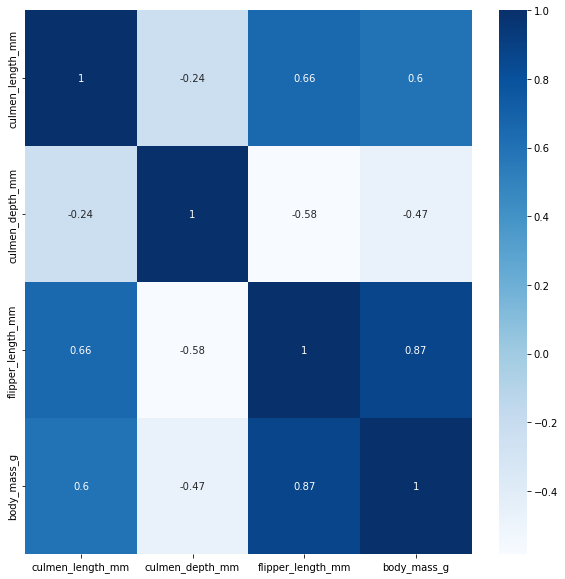

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

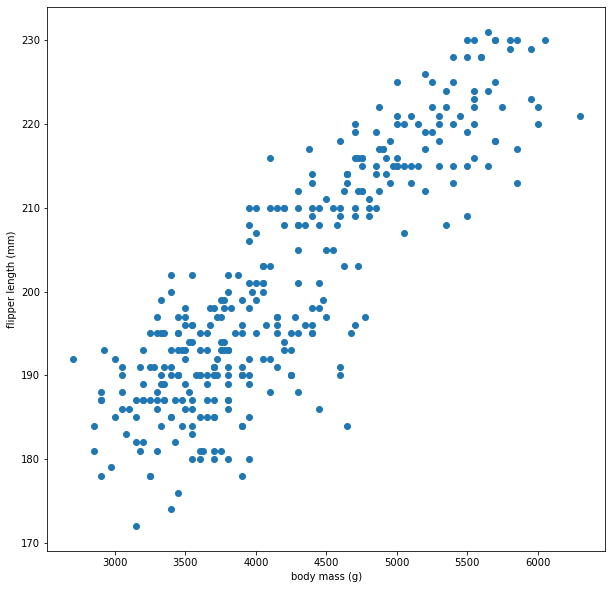

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(x='body_mass_g', y='flipper_length_mm', data=df)
plt.xlabel('body mass (g)')
plt.ylabel('flipper length (mm)')
plt.show()

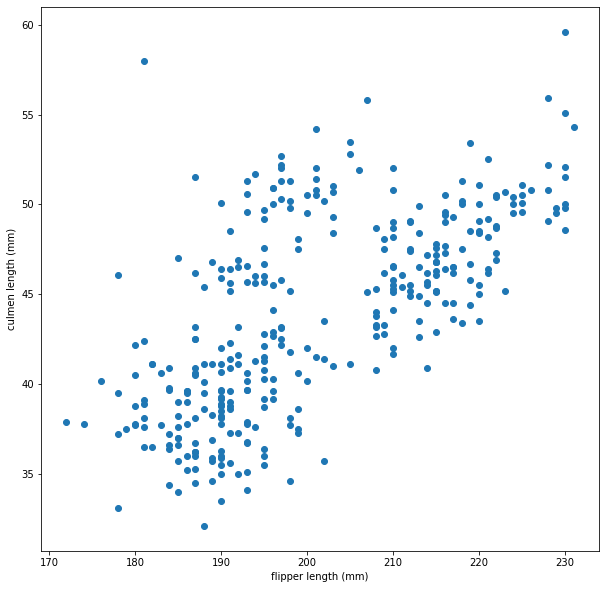

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(x='flipper_length_mm', y='culmen_length_mm', data=df)
plt.xlabel('flipper length (mm)')
plt.ylabel('culmen length (mm)')
plt.show()

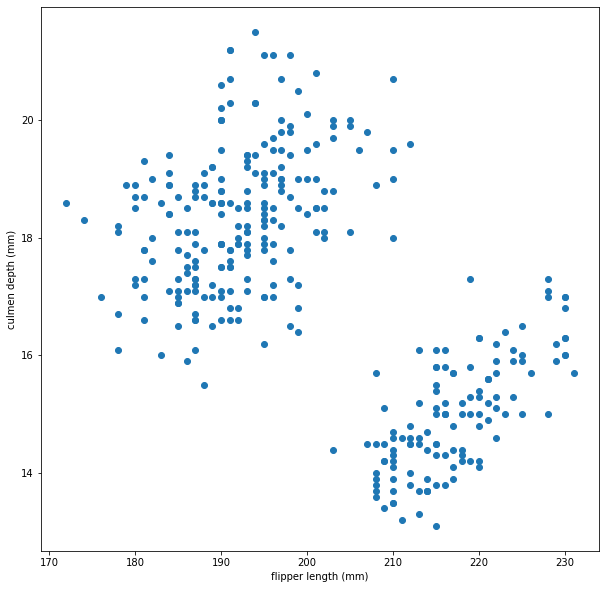

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(x='flipper_length_mm', y='culmen_depth_mm', data=df)
plt.xlabel('flipper length (mm)')
plt.ylabel('culmen depth (mm)')
plt.show()

In [13]:
df.drop_duplicates()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Data cleaning

In [14]:
species_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df['species'] = df['species'].map(species_num)

In [15]:
island_num = {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
df['island'] = df['island'].map(island_num)

In [16]:
gender_num = {'MALE': 0, 'FEMALE': 1, ".": 2}
df['sex'] = df['sex'].map(gender_num)
df['sex'] = df['sex'].fillna(3)

In [17]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(0)
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(0)
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(0)
df['body_mass_g'] = df['body_mass_g'].fillna(0)

Experiment with different ratios

(60-20-20)

Create training, validation and test data

In [18]:
features = df.drop('species', axis=1)
labels = df['species']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.4, random_state=42)
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5, random_state=42)

for dataset in [train_labels, val_labels, test_labels]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [19]:
train_features.to_csv('train_features_60.csv', index=False)
val_features.to_csv('val_features_20.csv', index=False)
test_features.to_csv('test_features_20.csv', index=False)

train_labels.to_csv('train_labels_60.csv', index=False)
val_labels.to_csv('val_labels_20.csv', index=False)
test_labels.to_csv('test_labels_20.csv', index=False)

Find optimal hyperparameters: LR, SVM, MLP (60-20-20)

LR

In [20]:
tr_features = pd.read_csv('train_features_60.csv')
tr_labels = pd.read_csv('train_labels_60.csv')

In [21]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

BEST PARAMS: {'C': 1}

0.869 (+/-0.064) for {'C': 0.001}
0.971 (+/-0.036) for {'C': 0.01}
0.976 (+/-0.03) for {'C': 0.1}
0.981 (+/-0.019) for {'C': 1}
0.98 (+/-0.037) for {'C': 10}
0.976 (+/-0.031) for {'C': 100}
0.976 (+/-0.031) for {'C': 1000}


/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

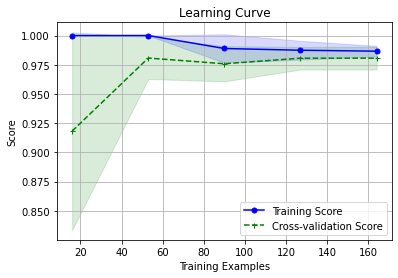

In [23]:
def create_learning_curve(est, x, y):
    train_sizes, train_scores, test_scores = learning_curve(est, X=x, y=y)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross-validation Score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())


SVM

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.981 (+/-0.036) for {'C': 0.1, 'kernel': 'linear'}
0.748 (+/-0.021) for {'C': 0.1, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 1, 'kernel': 'linear'}
0.748 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 10, 'kernel': 'linear'}
0.743 (+/-0.049) for {'C': 10, 'kernel': 'rbf'}


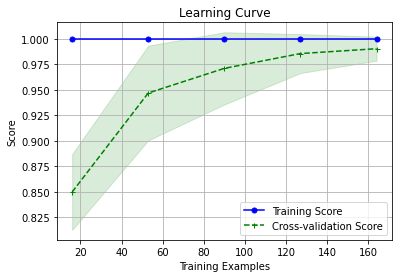

['SVM_model.pkl']

In [24]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

MLP

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoff

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.326 (+/-0.181) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.417 (+/-0.055) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.316 (+/-0.19) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.32 (+/-0.151) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.349 (+/-0.213) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.256 (+/-0.253) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.438 (+/-0.494) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.384 (+/-0.255) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.374 (+/-0.129) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lea

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoff

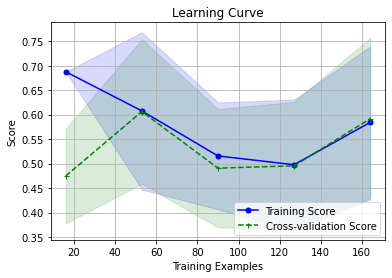

['MLP_model.pkl']

In [25]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())
joblib.dump(cv.best_estimator_, 'MLP_model.pkl')

Model evaluation

In [26]:
val_features = pd.read_csv('val_features_20.csv')
val_labels = pd.read_csv('val_labels_20.csv')

te_features = pd.read_csv('test_features_20.csv')
te_labels = pd.read_csv('test_labels_20.csv')

models = {}

for mdl in ['LR', 'SVM', 'MLP']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))
    
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average="micro"), 3)
    recall = round(recall_score(labels, pred, average="micro"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [27]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.1ms
SVM -- Accuracy: 0.986 / Precision: 0.986 / Recall: 0.986 / Latency: 1.2ms
MLP -- Accuracy: 0.551 / Precision: 0.551 / Recall: 0.551 / Latency: 1.7ms


In [28]:
evaluate_model('LR', models['LR'], te_features, te_labels)

LR -- Accuracy: 0.986 / Precision: 0.986 / Recall: 0.986 / Latency: 1.2ms


Which model performed the best and why?

LR is best-performing model among the three I chose. This is hardly suprising, since we only have one targeting variable (we're just predicting the class of penguin species), the data isn't massive, and the data is fairly well-behaved.

SVM also performed well on the validation set (its latency is the lowest), though the accuracy, precision and recall are all lower than LR.

As of MLP, even though it's quite fast, it has the lowest accuracy, precision and recall among the three models. Considering the rather limited data available, this is expected.  

(80-10-10)

Create training, validation and test data

In [29]:
features = df.drop('species', axis=1)
labels = df['species']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5, random_state=42)

for dataset in [train_labels, val_labels, test_labels]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [30]:
train_features.to_csv('train_features_80.csv', index=False)
val_features.to_csv('val_features_10.csv', index=False)
test_features.to_csv('test_features_10.csv', index=False)

train_labels.to_csv('train_labels_80.csv', index=False)
val_labels.to_csv('val_labels_10.csv', index=False)
test_labels.to_csv('test_labels_10.csv', index=False)

LR

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

BEST PARAMS: {'C': 1000}

0.887 (+/-0.071) for {'C': 0.001}
0.982 (+/-0.023) for {'C': 0.01}
0.978 (+/-0.015) for {'C': 0.1}
0.982 (+/-0.023) for {'C': 1}
0.975 (+/-0.029) for {'C': 10}
0.975 (+/-0.018) for {'C': 100}
0.985 (+/-0.015) for {'C': 1000}


/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

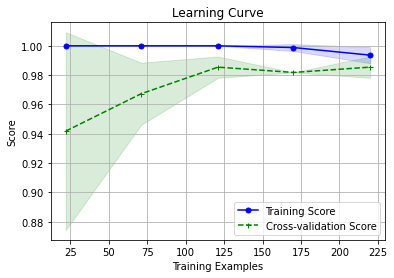

['LR_model_v2.pkl']

In [31]:
tr_features = pd.read_csv('train_features_80.csv')
tr_labels = pd.read_csv('train_labels_80.csv')

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())
joblib.dump(cv.best_estimator_, 'LR_model_v2.pkl')

SVM

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.982 (+/-0.023) for {'C': 0.1, 'kernel': 'linear'}
0.742 (+/-0.058) for {'C': 0.1, 'kernel': 'rbf'}
0.989 (+/-0.018) for {'C': 1, 'kernel': 'linear'}
0.742 (+/-0.084) for {'C': 1, 'kernel': 'rbf'}
0.985 (+/-0.015) for {'C': 10, 'kernel': 'linear'}
0.745 (+/-0.08) for {'C': 10, 'kernel': 'rbf'}


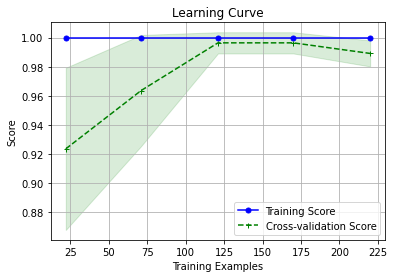

['SVM_model_v2.pkl']

In [32]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())
joblib.dump(cv.best_estimator_, 'SVM_model_v2.pkl')

MLP

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoff

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.367 (+/-0.18) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.327 (+/-0.231) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.335 (+/-0.242) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.433 (+/-0.158) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.404 (+/-0.272) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.564 (+/-0.238) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.567 (+/-0.215) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.582 (+/-0.249) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.502 (+/-0.412) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'le

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Geoff

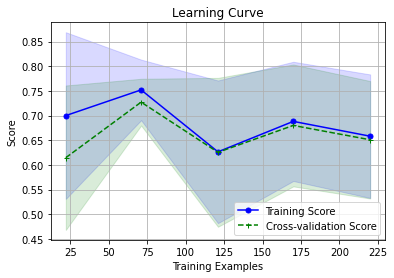

['MLP_model_v2.pkl']

In [33]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())
joblib.dump(cv.best_estimator_, 'MLP_model_v2.pkl')

Model evaluation

In [34]:
models = {}

for mdl in ['LR', 'SVM', 'MLP']:
    models[mdl] = joblib.load('{}_model_v2.pkl'.format(mdl))
    
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.3ms
SVM -- Accuracy: 0.971 / Precision: 0.971 / Recall: 0.971 / Latency: 2.2ms
MLP -- Accuracy: 0.743 / Precision: 0.743 / Recall: 0.743 / Latency: 1.2ms


In [35]:
evaluate_model('LR', models['LR'], te_features, te_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.8ms


Which model performed the best and why?

LR is best-performing model among the three I chose. This is hardly suprising, since we only have one targeting variable (we're just predicting the class of penguin species), the data isn't massive, and the data is fairly well-behaved.

SVM also performed well on the validation set, though the accuracy, precision and recall are all lower than LR.

As of MLP, even though it's quite fast (it has the lowest latency among all three models), it also has the lowest accuracy, precision and recall among the three models. Considering the rather limited data available, this is expected.  

What was the best proportion or split ratio of data from the set of experiments you conducted and why?

From my experiment, 80-10-10 is the best, even though the training takes longer. In addition to being much faster in the evaluation process, the accuracy, precision and recall are much higher than 60-20-20, even for algorithms that are not suitable for this experiment like the MLP (due to the larger amount of training data).